In [47]:
#Load data as Pandas Dataframe using pandas
#numpy for array and mathematical operations
#matplotlib for ploting results

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('f:/python/DWH Training.csv',names=['height','weight','gender'])
data.gender=data.gender.replace(-1,0)

In [49]:
#Test data to test the trained model 

In [50]:
test_data=pd.read_csv('f:/python/DWH_test.csv',names=['height','weight','gender','d'])
test_data=test_data[['height','weight','gender']]
test_data.gender=test_data.gender.replace(-1,0)

In [51]:
#standardization is recommended when continuous independent variables are measured at different scales.
#we use z score for scaling data

In [52]:
def standardize_data(data):
    data['height']=(data['height']-np.mean(data['height']))/np.std(data['height'])
    data['weight']=(data['weight']-np.mean(data['weight']))/np.std(data['weight'])
    x=np.array(data[['height','weight']])
    y=np.array([[i] for i in data.gender])
    return x,y

test_x,test_y=standardize_data(test_data)

In [53]:
#To get output of test data using trained weights and bias

In [54]:
def test_feedforward(test_x,test_y):
    layer1 = sigmoid(np.dot(test_x,nn.weights1)+np.ones((len(test_x),1))*nn.bias1.mean())
    layer2 = sigmoid(np.dot(layer1,nn.weights2)+np.ones((len(test_x),1))*nn.bias2.mean())
    output = sigmoid(np.dot(layer2,nn.weights3)+np.ones((len(test_x),1))*nn.bias3.mean())
    return output,test_y

In [55]:
# Activation function is important in Neural Network to process varius inputs corresponding with the weights and bias

In [56]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [57]:
#derivative of Activaion function

In [58]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [59]:
#implementation of a Neural networks.
#network consists of input, 2 hidden and output layers.
#in the network there are two inputs(height and weight) in input layer.
#each hidden layer contains 5 neurons 
#output neuron gives the gender

In [97]:
class NeuralNetwork:
    
    def __init__(self,x,y):
        np.random.seed(1)
        
        self.input = x
        
        #initialize with random weights ranging between 0 and 1.
        self.weights1 = np.random.rand(self.input.shape[1],5)
        self.weights2 = np.random.rand(5,5)
        self.weights3 = np.random.rand(5,1)
        
        #initialize with random weights ranging between 0 and 1 
        self.bias1=np.ones((len(self.input),1))*np.random.rand(1,5)
        self.bias2=np.ones((len(self.input),1))*np.random.rand(1,5)
        self.bias3=np.ones((len(self.input),1))*np.random.rand(1,1)
        
        #initialize momentum for weights with zeros and dimensions equal to dimensions of weights of each layer
        self.momentum_w1=np.zeros((2,5))
        self.momentum_w2=np.zeros((5,5))
        self.momentum_w3=np.zeros((5,1))
        
        #initialize momentum for bias with random numbers ranging between 0 and 1 and dimensions equal to dimensions of bias of each layer
        self.momentum_b1=np.random.rand(1,5)
        self.momentum_b2=np.random.rand(1,5)
        self.momentum_b3=np.random.rand(1,1)
        
        self.y=y
        
        self.output = np.zeros(self.y.shape)
        
        self.loss = 0
        
        self.loss1 = 0
    
    #calculates the derivative of loss function and its binary cross entropy function
    def loss_function_derivative(self):
        
        return -(self.y/self.output)+((1-self.y)/(1-self.output))
    
    #calculates the output for each iteration
    def feedforward(self):
       
        self.layer1 = sigmoid(np.dot(self.input,self.weights1)+self.bias1)
        self.layer2 = sigmoid(np.dot(self.layer1,self.weights2)+self.bias2)
        self.output = sigmoid(np.dot(self.layer2,self.weights3)+self.bias3) 
        
    #based on loss at output layer it updates weights using backpropogation method
    def back_propogation(self,l_rate,sie):
        ls=[]
        itr=[]
        ls1=[]
        for t in range(1,10001):
            self.feedforward()
            loss_func= self.loss_function_derivative()   
            
            #calucalate the derivative of weights at layer2
            delta_3=np.multiply(loss_func,sigmoid_derivative(self.output) )
            d_weights3 = np.dot(self.layer2.T,delta_3)
            
            #calucalate the derivative of weights at layer1
            delta_2=np.dot(delta_3,self.weights3.T)*sigmoid_derivative(self.layer2)
            d_weights2 = np.dot(self.layer1.T,delta_2)
            
            #calucalate the derivative of weights at input layer
            delta_1=np.dot(delta_2,self.weights2.T)*sigmoid_derivative(self.layer1)
            d_weights1 = np.dot(self.input.T,delta_1) 
            
            #calucalate the derivative of bias at output layer
            d_bias3=np.multiply(loss_func,sigmoid_derivative(self.output))
            
            #calucalate the derivative of bias at layer2
            d_bias2=d_bias3*sigmoid_derivative(self.layer2)
            
            #calucalate the derivative of bias at layer1
            d_bias1=d_bias2*sigmoid_derivative(self.layer1)  
            
            #momentum is used to increase training speed and accuracy in minimum iterations than a network without momentum.
            self.momentum_w1 = sie*self.momentum_w1+d_weights1
            self.momentum_w2 = sie*self.momentum_w2+d_weights2
            self.momentum_w3 = sie*self.momentum_w3+d_weights3
        
            self.weights3 -= l_rate*self.momentum_w3
            self.weights2 -= l_rate*self.momentum_w2
            self.weights1 -= l_rate*self.momentum_w1
            
            self.momentum_b1 = sie*self.momentum_b1+d_bias1
            self.momentum_b2 = sie*self.momentum_b2+d_bias2
            self.momentum_b3 = sie*self.momentum_b3+d_bias3
            
            self.bias1 -= l_rate*self.momentum_b1
            self.bias2 -= l_rate*self.momentum_b2
            self.bias3 -= l_rate*self.momentum_b3
            
            test_op,y_test=test_feedforward(test_x,test_y)
            
            #calculates loss at output layer of training data
            nn.loss=np.mean(np.square((nn.y*np.log(nn.output))+((1-nn.y)*np.log(1-nn.output))))
            
            #calculates loss at output layer of test data
            nn.loss1=np.mean(np.square((y_test*np.log(test_op))+((1-y_test)*np.log(1-test_op))))
                 
            if t%1000==0:
                itr.append(t)
                #calcuates accuracy of train data after t iterations
                tr_acc=float((len(y)-sum(np.square(y-np.round(nn.output))))/len(y)*100)
                
                #calcuates accuracy of test data after t iterations
                te_acc=float((len(y_test)-sum(np.square(y_test-np.round(test_op))))/len(y_test)*100)
                
                ls.append(tr_acc)
                ls1.append(te_acc)
                
                print(f'Training Accuracy after {t} iterations : {tr_acc}')
                print()
                print(f'Test Accuracy after {t} iterations : {te_acc}')
                print()
        return itr,ls,ls1
    

In [98]:
#plot a graph for Accuracy of test/train data against number of iterations 

Training Accuracy after 1000 iterations : 52.1551724137931

Test Accuracy after 1000 iterations : 44.44444444444444

Training Accuracy after 2000 iterations : 52.58620689655172

Test Accuracy after 2000 iterations : 44.44444444444444

Training Accuracy after 3000 iterations : 66.37931034482759

Test Accuracy after 3000 iterations : 44.44444444444444

Training Accuracy after 4000 iterations : 86.63793103448276

Test Accuracy after 4000 iterations : 46.666666666666664

Training Accuracy after 5000 iterations : 86.20689655172413

Test Accuracy after 5000 iterations : 82.22222222222221

Training Accuracy after 6000 iterations : 87.06896551724138

Test Accuracy after 6000 iterations : 82.22222222222221

Training Accuracy after 7000 iterations : 88.36206896551724

Test Accuracy after 7000 iterations : 86.66666666666667

Training Accuracy after 8000 iterations : 90.51724137931035

Test Accuracy after 8000 iterations : 86.66666666666667

Training Accuracy after 9000 iterations : 90.51724137931

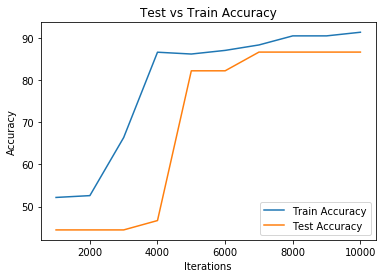

In [102]:
if __name__=='__main__':
    
    x,y=standardize_data(data)

    nn=NeuralNetwork(x,y)

    x_p,y_p,y_pp=nn.back_propogation(0.0001,0.1)
    
    plt.plot(x_p,y_p,label='Train Accuracy')
    
    plt.plot(x_p,y_pp,label='Test Accuracy')
    
    plt.legend(loc='best')
    
    plt.xlabel('Iterations')
    
    plt.ylabel('Accuracy')
    
    plt.title('Test vs Train Accuracy')
    
    plt.show()